In [16]:
import gc
import xarray as xr
import rioxarray
import numpy as np

from rattlinbog.sampling import sample_uniformly

In [11]:
tile = xr.open_zarr("/shared/italy/measurements/V1M0R1/EQUI7_EU500M/E048N006T6/SM-EST-IN_20160101T050131_20171231T171119_VV_SIG0-R-CRRL_E048N006T6_EU500M_V1M0R1__TUWIEN.zarr")
tile

<xarray.Dataset>
Dimensions:                  (time_LAI300: 147, parameter_LAI300: 1, y: 1200,
                              x: 1200, orbit_PLIA-TAG-MEAN: 12,
                              parameter_PLIA-TAG-MEAN: 1,
                              time_SIG0-R-CRRL: 1140, parameter_SIG0-R-CRRL: 1,
                              parameter_swvl1: 1, time_swvl1: 1142)
Coordinates:
  * orbit_PLIA-TAG-MEAN      (orbit_PLIA-TAG-MEAN) <U4 'A015' 'A044' ... 'D168'
    orbit_SIG0-R-CRRL        (time_SIG0-R-CRRL) <U4 dask.array<chunksize=(1140,), meta=np.ndarray>
  * parameter_LAI300         (parameter_LAI300) int64 1
  * parameter_PLIA-TAG-MEAN  (parameter_PLIA-TAG-MEAN) int64 1
  * parameter_SIG0-R-CRRL    (parameter_SIG0-R-CRRL) int64 1
  * parameter_swvl1          (parameter_swvl1) <U5 'swvl1'
  * time_LAI300              (time_LAI300) datetime64[ns] 2015-12-31 ... 2020...
  * time_SIG0-R-CRRL         (time_SIG0-R-CRRL) datetime64[ns] 2016-01-01T05:...
  * time_swvl1               (time_swvl1) datetime64[ns] 2016-01-01 ... 2018-...
  * x                        (x) float64 4.8e+06 4.801e+06 ... 5.399e+06 5.4e+06
  * y                        (y) float64 1.2e+06 1.199e+06 ... 6.002e+05
Data variables:
    LAI300                   (time_LAI300, parameter_LAI300, y, x) float32 dask.array<chunksize=(147, 1, 100, 100), meta=np.ndarray>
    PLIA-TAG-MEAN            (orbit_PLIA-TAG-MEAN, parameter_PLIA-TAG-MEAN, y, x) float32 dask.array<chunksize=(12, 1, 100, 100), meta=np.ndarray>
    SIG0-R-CRRL              (time_SIG0-R-CRRL, parameter_SIG0-R-CRRL, y, x) float32 dask.array<chunksize=(1140, 1, 100, 100), meta=np.ndarray>
    crs                      int64 ...
    spatial_ref              int64 ...
    swvl1                    (time_swvl1, parameter_swvl1, y, x) float32 dask.array<chunksize=(1142, 1, 100, 100), meta=np.ndarray>
Attributes:
    prime_variable:  SIG0-R-CRRL

In [12]:
scores = rioxarray.open_rasterio("/shared/italy/validation/V1M0R1/EQUI7_EU500M/E048N006T6/CORR-SM-swvl1_20170101T000000_20171231T235959_VV_SIG0-R-CRRL_E048N006T6_EU500M_V1M0R1__TUWIEN.tif")
scores

<xarray.DataArray (band: 1, y: 1200, x: 1200)>
[1440000 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.8e+06 4.801e+06 4.801e+06 ... 5.399e+06 5.4e+06
  * y            (y) float64 1.2e+06 1.199e+06 1.199e+06 ... 6.008e+05 6.002e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [24]:
valid_mask = ~np.isnan(scores[0])
valid_mask.name = "total"
valid_mask

<xarray.DataArray 'total' (y: 1200, x: 1200)>
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.8e+06 4.801e+06 4.801e+06 ... 5.399e+06 5.4e+06
  * y            (y) float64 1.2e+06 1.199e+06 1.199e+06 ... 6.008e+05 6.002e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [25]:
sampled = sample_uniformly(tile, [valid_mask], 10000, seed=42)
sampled

<xarray.Dataset>
Dimensions:                  (samples: 1, time_LAI300: 147,
                              parameter_LAI300: 1, sampled: 10000,
                              orbit_PLIA-TAG-MEAN: 12,
                              parameter_PLIA-TAG-MEAN: 1,
                              time_SIG0-R-CRRL: 1140, parameter_SIG0-R-CRRL: 1,
                              parameter_swvl1: 1, time_swvl1: 1142)
Coordinates:
  * orbit_PLIA-TAG-MEAN      (orbit_PLIA-TAG-MEAN) <U4 'A015' 'A044' ... 'D168'
    orbit_SIG0-R-CRRL        (time_SIG0-R-CRRL) <U4 dask.array<chunksize=(1140,), meta=np.ndarray>
  * parameter_LAI300         (parameter_LAI300) int64 1
  * parameter_PLIA-TAG-MEAN  (parameter_PLIA-TAG-MEAN) int64 1
  * parameter_SIG0-R-CRRL    (parameter_SIG0-R-CRRL) int64 1
  * parameter_swvl1          (parameter_swvl1) <U5 'swvl1'
  * time_LAI300              (time_LAI300) datetime64[ns] 2015-12-31 ... 2020...
  * time_SIG0-R-CRRL         (time_SIG0-R-CRRL) datetime64[ns] 2016-01-01T05:...
  * time_swvl1               (time_swvl1) datetime64[ns] 2016-01-01 ... 2018-...
    x                        (sampled) float64 4.949e+06 5.188e+06 ... 4.853e+06
    y                        (sampled) float64 9.722e+05 1.186e+06 ... 1.166e+06
  * samples                  (samples) <U5 'total'
Dimensions without coordinates: sampled
Data variables:
    LAI300                   (samples, time_LAI300, parameter_LAI300, sampled) float32 dask.array<chunksize=(1, 147, 1, 10000), meta=np.ndarray>
    PLIA-TAG-MEAN            (samples, orbit_PLIA-TAG-MEAN, parameter_PLIA-TAG-MEAN, sampled) float32 dask.array<chunksize=(1, 12, 1, 10000), meta=np.ndarray>
    SIG0-R-CRRL              (samples, time_SIG0-R-CRRL, parameter_SIG0-R-CRRL, sampled) float32 dask.array<chunksize=(1, 1140, 1, 10000), meta=np.ndarray>
    crs                      (samples) int64 0
    spatial_ref              (samples) int64 0
    swvl1                    (samples, time_swvl1, parameter_swvl1, sampled) float32 dask.array<chunksize=(1, 1142, 1, 10000), meta=np.ndarray>
Attributes:
    prime_variable:  SIG0-R-CRRL

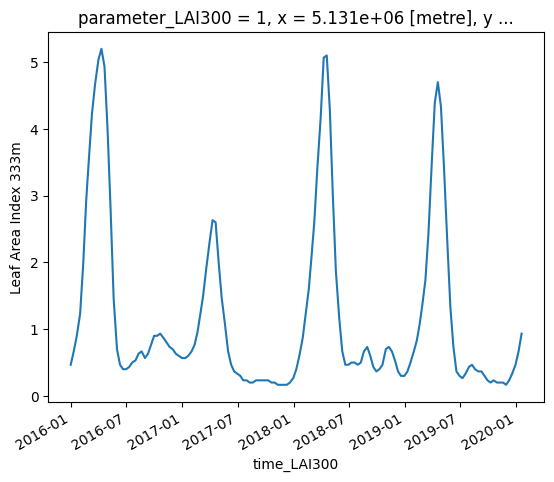

In [37]:
sampled['LAI300'].loc['total'][:, 0, 5000].plot()

In [40]:
y, x = [arr.flatten() for arr in np.meshgrid(range(100), range(100))]
sampled_tiles = sampled.assign_coords({'y': ('sampled', y), 'x': ('sampled', x)}).set_index({'sampled': ('y', 'x')}).unstack('sampled')
sampled_tiles

<xarray.Dataset>
Dimensions:                  (y: 100, x: 100, orbit_PLIA-TAG-MEAN: 12,
                              parameter_LAI300: 1, parameter_PLIA-TAG-MEAN: 1,
                              parameter_SIG0-R-CRRL: 1, parameter_swvl1: 1,
                              time_LAI300: 147, time_SIG0-R-CRRL: 1140,
                              time_swvl1: 1142, samples: 1)
Coordinates:
  * y                        (y) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
  * x                        (x) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
  * orbit_PLIA-TAG-MEAN      (orbit_PLIA-TAG-MEAN) <U4 'A015' 'A044' ... 'D168'
  * parameter_LAI300         (parameter_LAI300) int64 1
  * parameter_PLIA-TAG-MEAN  (parameter_PLIA-TAG-MEAN) int64 1
  * parameter_SIG0-R-CRRL    (parameter_SIG0-R-CRRL) int64 1
  * parameter_swvl1          (parameter_swvl1) <U5 'swvl1'
  * time_LAI300              (time_LAI300) datetime64[ns] 2015-12-31 ... 2020...
  * time_SIG0-R-CRRL         (time_SIG0-R-CRRL) datetime64[ns] 2016-01-01T05:...
  * time_swvl1               (time_swvl1) datetime64[ns] 2016-01-01 ... 2018-...
  * samples                  (samples) <U5 'total'
    orbit_SIG0-R-CRRL        (time_SIG0-R-CRRL) <U4 dask.array<chunksize=(1140,), meta=np.ndarray>
Data variables:
    LAI300                   (samples, time_LAI300, parameter_LAI300, y, x) float32 dask.array<chunksize=(1, 147, 1, 100, 100), meta=np.ndarray>
    PLIA-TAG-MEAN            (samples, orbit_PLIA-TAG-MEAN, parameter_PLIA-TAG-MEAN, y, x) float32 dask.array<chunksize=(1, 12, 1, 100, 100), meta=np.ndarray>
    SIG0-R-CRRL              (samples, time_SIG0-R-CRRL, parameter_SIG0-R-CRRL, y, x) float32 dask.array<chunksize=(1, 1140, 1, 100, 100), meta=np.ndarray>
    crs                      (samples) int64 0
    spatial_ref              (samples) int64 0
    swvl1                    (samples, time_swvl1, parameter_swvl1, y, x) float32 dask.array<chunksize=(1, 1142, 1, 100, 100), meta=np.ndarray>
Attributes:
    prime_variable:  SIG0-R-CRRL

In [55]:
sampled_tiles.to_zarr("/tmp/sampled_tile.zarr")